In [1]:
import pandas as pd
import pymongo
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # ÌòπÏùÄ Îã§Î•∏ ÏÑ§ÏπòÌïú Nanum Ìè∞Ìä∏ ÏÇ¨Ïö©
import scipy
import scipy.stats as stats

# client=pymongo.MongoClient("trainings.iptime.org",48003)
client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']
tour_pass_review = db['data_tour_pass_review']
tour_pass_review = tour_pass_review.find()
tour_pass_review = pd.DataFrame(tour_pass_review)
data_tour_pass_review_tmon = db['data_tour_pass_review_tmon']
data_tour_pass_review_tmon = data_tour_pass_review_tmon.find()
data_tour_pass_review_tmon = pd.DataFrame(data_tour_pass_review_tmon)

In [2]:
df_tour_pass_review = pd.concat(objs=[tour_pass_review,data_tour_pass_review_tmon])

# tour_pass_review['date'] = tour_pass_review['date'][:4]

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

## ÎÇ†Ïßú ÌòïÏãù Î≥ÄÌôò

In [3]:
def date_format(raw):
    raw = raw.split('.')
    raw = '20'+raw[0]+raw[1]
    return raw
def year(raw):
    raw = raw[:4]
    return raw
def month(raw):
    raw = raw[4:]
    return raw
def month(raw):
    raw = raw[4:]
    return raw
df_tour_pass_review.loc[:,'date_format'] = df_tour_pass_review['date'].apply(date_format)
df_tour_pass_review.loc[:,'year'] = df_tour_pass_review['date_format'].apply(year)
df_tour_pass_review.loc[:,'month'] = df_tour_pass_review['date_format'].apply(month)
df_tour_pass_review

_id                                     title  \
0     663dea3806635b047a688c55  Ïó¨ÏàòÌà¨Ïñ¥Ìå®Ïä§ ÌÜµÌï©Í∂å Ïó¨ÏàòÌï´ÌîåÌå®Ïä§ ÌÖåÎîîÎ≤†Ïñ¥ÎÆ§ÏßÄÏóÑ ÎÖπÌÖåÎßàÎ†à ÌÅ¨Î£®Ï¶à Î£®ÏßÄ Î™®Ï∞å   
1     663dea3806635b047a688c56  Ïó¨ÏàòÌà¨Ïñ¥Ìå®Ïä§ ÌÜµÌï©Í∂å Ïó¨ÏàòÌï´ÌîåÌå®Ïä§ ÌÖåÎîîÎ≤†Ïñ¥ÎÆ§ÏßÄÏóÑ ÎÖπÌÖåÎßàÎ†à ÌÅ¨Î£®Ï¶à Î£®ÏßÄ Î™®Ï∞å   
2     663dea3806635b047a688c57  Ïó¨ÏàòÌà¨Ïñ¥Ìå®Ïä§ ÌÜµÌï©Í∂å Ïó¨ÏàòÌï´ÌîåÌå®Ïä§ ÌÖåÎîîÎ≤†Ïñ¥ÎÆ§ÏßÄÏóÑ ÎÖπÌÖåÎßàÎ†à ÌÅ¨Î£®Ï¶à Î£®ÏßÄ Î™®Ï∞å   
3     663dea3806635b047a688c58  Ïó¨ÏàòÌà¨Ïñ¥Ìå®Ïä§ ÌÜµÌï©Í∂å Ïó¨ÏàòÌï´ÌîåÌå®Ïä§ ÌÖåÎîîÎ≤†Ïñ¥ÎÆ§ÏßÄÏóÑ ÎÖπÌÖåÎßàÎ†à ÌÅ¨Î£®Ï¶à Î£®ÏßÄ Î™®Ï∞å   
4     663dea3806635b047a688c59  Ïó¨ÏàòÌà¨Ïñ¥Ìå®Ïä§ ÌÜµÌï©Í∂å Ïó¨ÏàòÌï´ÌîåÌå®Ïä§ ÌÖåÎîîÎ≤†Ïñ¥ÎÆ§ÏßÄÏóÑ ÎÖπÌÖåÎßàÎ†à ÌÅ¨Î£®Ï¶à Î£®ÏßÄ Î™®Ï∞å   
...                        ...                                       ...   
1040  663edc33cf0309091221da84             [Í∞ïÏõê] Í∞ïÎ¶âÏ†úÎ°úÌå®Ïä§\nÌïòÏä¨ÎùºÏïÑÌä∏ÏõîÎìú,ÏÑ†ÍµêÏû• Î¨¥Î£åÏûÖÏû•   
1041  663edc33cf0309091221da85             [Í∞ïÏõê] Í∞ïÎ¶âÏ†úÎ°úÌå®Ïä§\nÌïòÏä¨ÎùºÏïÑÌä∏ÏõîÎìú,ÏÑ†ÍµêÏû• Î¨¥Î£åÏûÖÏû•   
1042  663edc6111e8110b348ba7de                  [Ï£ºÎßêÏóêÏñ¥ÎîîÍ∞Ä] Ï†ÑÎ∂ÅÌà¨Ïñ¥Ìå®Ïä§\nÎÇ®ÏõêÏ∂òÌñ•Ïó¨ÌñâÍ∂å   
1043  663edc6111e8110b348ba7df                  [Ï£ºÎßêÏóêÏñ¥ÎîîÍ∞Ä] Ï†ÑÎ∂ÅÌà¨Ïñ¥Ìå®Ïä§\nÎÇ®ÏõêÏ∂òÌñ•Ïó¨ÌñâÍ∂å   
1044  663edc6111e8110b348ba7e0                  [Ï£ºÎßêÏóêÏñ¥ÎîîÍ∞Ä] Ï†ÑÎ∂ÅÌà¨Ïñ¥Ìå®Ïä§\nÎÇ®ÏõêÏ∂òÌñ•Ïó¨ÌñâÍ∂å   

     region rating       date  \
0        Ï†ÑÎÇ®      5  24.03.24.   
1        Ï†ÑÎÇ®      4  24.04.29.   
2        Ï†ÑÎÇ®      5  24.04.24.   
3        Ï†ÑÎÇ®      5  24.04.15.   
4        Ï†ÑÎÇ®      5  24.05.02.   
...     ...    ...        ...   
1040     Í∞ïÏõê      5  24.04.25.   
1041     Í∞ïÏõê      5  24.04.18.   
1042     Ï†ÑÎ∂Å      5  24.03.24.   
1043     Ï†ÑÎ∂Å      5  24.03.07.   
1044     Ï†ÑÎ∂Å      5  24.03.03.   

                                                content date_format  year  \
0     ÎÇ®Ìé∏Í≥º Í∞ëÏûëÏä§ÎüΩÍ≤å Í∞ÄÍ≤å Îêú Ïó¨ÏàòÏó¨Ìñâ ÎëòÎã§ Ïó¨ÏàòÎäî Ï≤òÏùåÏù¥Îùº Ïñ¥ÎîîÎ•º Í∞ÄÏïºÌï†ÏßÄ Î¨¥ÏóáÏùÑ Ìï¥...      202403  2024   
1     Ï†ÄÎ†¥Ìïú Í∞ÄÍ≤©Ïóê Ïó¨Îü¨Íµ∞Îç∞ ÎëòÎü¨ Î≥ºÏàòÏûàÏñ¥ Ï¢ãÏïòÏñ¥Ïöî.\nÎã§Îßå Î¨∏ÏùÑ ÏùºÏ∞ç Îã´Í±∞ÎÇò ÏòÅÏóÖÏãúÍ∞ÑÏù¥...      202404  2024   
2     ÏïÑÏù¥Îì§Í≥ºÌï®Íªò  Ï¶êÍ±∞Ïö¥ Ïó¨ÌñâÌïòÍ≥† ÏôîÏäµÎãàÎã§. ÏÇ¨ÏßÑÎ≥¥ÏãúÎ©¥ Ïñ¥ÎîîÏñ¥Îîî Í∞îÎäîÏßÄ ÏïåÏàòÏûàÍµ¨Ïöî. 1...      202404  2024   
3     ÏïÑÏ£º Ï¢ãÎÑ§Ïöî\nÍπÄÍ≤ΩÏò§ÌååÌã∞Ïì∞Î¶¨ÏóêÏÑú Î∞îÎã§Î≥¥Î©∞ ÏïÑÏïÑ ÌïúÏûî ÌïòÍ≥†Ïöî...Í∑∏Îã• ÏπúÏ†àÌïòÏßÑ ÏïäÏïòÏñ¥...      202404  2024   
4     Ï≤òÏùå Ïù¥Ïö©Ìï¥Î≥¥ÏïòÎäîÎç∞ Í∞ÄÏÑ±ÎπÑÏ¢ãÏùÄÍ≤ÉÍ∞ôÏäµÎãàÎã§. Ï£ºÎßêÏóêÏù¥Ïö©ÌïòÎäîÎç∞ Ï≤¥ÌóòÌïòÍ≥† ÌôúÎèôÌïòÎäîÍ≤ÉÏùÄ Ï£ºÎßê...      202405  2024   
...                                                 ...         ...   ...   
1040                    ÎÑàÎ¨¥ Ï¢ãÏïòÏäµÎãàÎã§!! Îß§Ïû•ÎßàÎã§ ÏπúÏ†àÌïòÏÖ®Í≥† Ïª§ÌîºÎèÑ ÎßõÏûàÏóàÏñ¥Ïöî      202404  2024   
1041                                        Ï¢ãÏäµÎãàÎîòÏ¢ãÏïÑÏöî„Ñ≤„Öé„Ñ≤„Ñ±      202404  2024   
1042                           Ï∂òÌñ•ÌÖåÎßàÌååÌÅ¨Í∞Ä Ïö¥ÏòÅÏùÑ ÏïàÌïòÍ≥†ÏûáÏñ¥ÏÑú ÏïÑÏâ¨ÏõüÎÑ§Ïöî      202403  2024   
1043                                      Ï†ÄÎüÑÌïòÍ≤å Ïù¥Ïö©ÌñàÏñ¥Ïöî „Öé„Öé      202403  2024   
1044                                        ÏïàÎÖïÌïòÏÑ∏Ïöî Í∞êÏÇ¨Ìï©ÎãàÎã§      202403  2024   

     month  
0       03  
1       04  
2       04  
3       04  
4       05  
...    ...  
1040    04  
1041    04  
1042    03  
1043    03  
1044    03  

[28827 rows x 9 columns]

In [4]:
def year_count(raw):
    if int(raw) <= 202202:
        year = 1
    elif int(raw) <= 202302:
        year = 2
    else:
        year = 3
    return year
df_tour_pass_review.loc[:,'year_count'] = df_tour_pass_review['date_format'].apply(year_count)


In [5]:
df_tour_pass_review

_id                                     title  \
0     663dea3806635b047a688c55  Ïó¨ÏàòÌà¨Ïñ¥Ìå®Ïä§ ÌÜµÌï©Í∂å Ïó¨ÏàòÌï´ÌîåÌå®Ïä§ ÌÖåÎîîÎ≤†Ïñ¥ÎÆ§ÏßÄÏóÑ ÎÖπÌÖåÎßàÎ†à ÌÅ¨Î£®Ï¶à Î£®ÏßÄ Î™®Ï∞å   
1     663dea3806635b047a688c56  Ïó¨ÏàòÌà¨Ïñ¥Ìå®Ïä§ ÌÜµÌï©Í∂å Ïó¨ÏàòÌï´ÌîåÌå®Ïä§ ÌÖåÎîîÎ≤†Ïñ¥ÎÆ§ÏßÄÏóÑ ÎÖπÌÖåÎßàÎ†à ÌÅ¨Î£®Ï¶à Î£®ÏßÄ Î™®Ï∞å   
2     663dea3806635b047a688c57  Ïó¨ÏàòÌà¨Ïñ¥Ìå®Ïä§ ÌÜµÌï©Í∂å Ïó¨ÏàòÌï´ÌîåÌå®Ïä§ ÌÖåÎîîÎ≤†Ïñ¥ÎÆ§ÏßÄÏóÑ ÎÖπÌÖåÎßàÎ†à ÌÅ¨Î£®Ï¶à Î£®ÏßÄ Î™®Ï∞å   
3     663dea3806635b047a688c58  Ïó¨ÏàòÌà¨Ïñ¥Ìå®Ïä§ ÌÜµÌï©Í∂å Ïó¨ÏàòÌï´ÌîåÌå®Ïä§ ÌÖåÎîîÎ≤†Ïñ¥ÎÆ§ÏßÄÏóÑ ÎÖπÌÖåÎßàÎ†à ÌÅ¨Î£®Ï¶à Î£®ÏßÄ Î™®Ï∞å   
4     663dea3806635b047a688c59  Ïó¨ÏàòÌà¨Ïñ¥Ìå®Ïä§ ÌÜµÌï©Í∂å Ïó¨ÏàòÌï´ÌîåÌå®Ïä§ ÌÖåÎîîÎ≤†Ïñ¥ÎÆ§ÏßÄÏóÑ ÎÖπÌÖåÎßàÎ†à ÌÅ¨Î£®Ï¶à Î£®ÏßÄ Î™®Ï∞å   
...                        ...                                       ...   
1040  663edc33cf0309091221da84             [Í∞ïÏõê] Í∞ïÎ¶âÏ†úÎ°úÌå®Ïä§\nÌïòÏä¨ÎùºÏïÑÌä∏ÏõîÎìú,ÏÑ†ÍµêÏû• Î¨¥Î£åÏûÖÏû•   
1041  663edc33cf0309091221da85             [Í∞ïÏõê] Í∞ïÎ¶âÏ†úÎ°úÌå®Ïä§\nÌïòÏä¨ÎùºÏïÑÌä∏ÏõîÎìú,ÏÑ†ÍµêÏû• Î¨¥Î£åÏûÖÏû•   
1042  663edc6111e8110b348ba7de                  [Ï£ºÎßêÏóêÏñ¥ÎîîÍ∞Ä] Ï†ÑÎ∂ÅÌà¨Ïñ¥Ìå®Ïä§\nÎÇ®ÏõêÏ∂òÌñ•Ïó¨ÌñâÍ∂å   
1043  663edc6111e8110b348ba7df                  [Ï£ºÎßêÏóêÏñ¥ÎîîÍ∞Ä] Ï†ÑÎ∂ÅÌà¨Ïñ¥Ìå®Ïä§\nÎÇ®ÏõêÏ∂òÌñ•Ïó¨ÌñâÍ∂å   
1044  663edc6111e8110b348ba7e0                  [Ï£ºÎßêÏóêÏñ¥ÎîîÍ∞Ä] Ï†ÑÎ∂ÅÌà¨Ïñ¥Ìå®Ïä§\nÎÇ®ÏõêÏ∂òÌñ•Ïó¨ÌñâÍ∂å   

     region rating       date  \
0        Ï†ÑÎÇ®      5  24.03.24.   
1        Ï†ÑÎÇ®      4  24.04.29.   
2        Ï†ÑÎÇ®      5  24.04.24.   
3        Ï†ÑÎÇ®      5  24.04.15.   
4        Ï†ÑÎÇ®      5  24.05.02.   
...     ...    ...        ...   
1040     Í∞ïÏõê      5  24.04.25.   
1041     Í∞ïÏõê      5  24.04.18.   
1042     Ï†ÑÎ∂Å      5  24.03.24.   
1043     Ï†ÑÎ∂Å      5  24.03.07.   
1044     Ï†ÑÎ∂Å      5  24.03.03.   

                                                content date_format  year  \
0     ÎÇ®Ìé∏Í≥º Í∞ëÏûëÏä§ÎüΩÍ≤å Í∞ÄÍ≤å Îêú Ïó¨ÏàòÏó¨Ìñâ ÎëòÎã§ Ïó¨ÏàòÎäî Ï≤òÏùåÏù¥Îùº Ïñ¥ÎîîÎ•º Í∞ÄÏïºÌï†ÏßÄ Î¨¥ÏóáÏùÑ Ìï¥...      202403  2024   
1     Ï†ÄÎ†¥Ìïú Í∞ÄÍ≤©Ïóê Ïó¨Îü¨Íµ∞Îç∞ ÎëòÎü¨ Î≥ºÏàòÏûàÏñ¥ Ï¢ãÏïòÏñ¥Ïöî.\nÎã§Îßå Î¨∏ÏùÑ ÏùºÏ∞ç Îã´Í±∞ÎÇò ÏòÅÏóÖÏãúÍ∞ÑÏù¥...      202404  2024   
2     ÏïÑÏù¥Îì§Í≥ºÌï®Íªò  Ï¶êÍ±∞Ïö¥ Ïó¨ÌñâÌïòÍ≥† ÏôîÏäµÎãàÎã§. ÏÇ¨ÏßÑÎ≥¥ÏãúÎ©¥ Ïñ¥ÎîîÏñ¥Îîî Í∞îÎäîÏßÄ ÏïåÏàòÏûàÍµ¨Ïöî. 1...      202404  2024   
3     ÏïÑÏ£º Ï¢ãÎÑ§Ïöî\nÍπÄÍ≤ΩÏò§ÌååÌã∞Ïì∞Î¶¨ÏóêÏÑú Î∞îÎã§Î≥¥Î©∞ ÏïÑÏïÑ ÌïúÏûî ÌïòÍ≥†Ïöî...Í∑∏Îã• ÏπúÏ†àÌïòÏßÑ ÏïäÏïòÏñ¥...      202404  2024   
4     Ï≤òÏùå Ïù¥Ïö©Ìï¥Î≥¥ÏïòÎäîÎç∞ Í∞ÄÏÑ±ÎπÑÏ¢ãÏùÄÍ≤ÉÍ∞ôÏäµÎãàÎã§. Ï£ºÎßêÏóêÏù¥Ïö©ÌïòÎäîÎç∞ Ï≤¥ÌóòÌïòÍ≥† ÌôúÎèôÌïòÎäîÍ≤ÉÏùÄ Ï£ºÎßê...      202405  2024   
...                                                 ...         ...   ...   
1040                    ÎÑàÎ¨¥ Ï¢ãÏïòÏäµÎãàÎã§!! Îß§Ïû•ÎßàÎã§ ÏπúÏ†àÌïòÏÖ®Í≥† Ïª§ÌîºÎèÑ ÎßõÏûàÏóàÏñ¥Ïöî      202404  2024   
1041                                        Ï¢ãÏäµÎãàÎîòÏ¢ãÏïÑÏöî„Ñ≤„Öé„Ñ≤„Ñ±      202404  2024   
1042                           Ï∂òÌñ•ÌÖåÎßàÌååÌÅ¨Í∞Ä Ïö¥ÏòÅÏùÑ ÏïàÌïòÍ≥†ÏûáÏñ¥ÏÑú ÏïÑÏâ¨ÏõüÎÑ§Ïöî      202403  2024   
1043                                      Ï†ÄÎüÑÌïòÍ≤å Ïù¥Ïö©ÌñàÏñ¥Ïöî „Öé„Öé      202403  2024   
1044                                        ÏïàÎÖïÌïòÏÑ∏Ïöî Í∞êÏÇ¨Ìï©ÎãàÎã§      202403  2024   

     month  year_count  
0       03           3  
1       04           3  
2       04           3  
3       04           3  
4       05           3  
...    ...         ...  
1040    04           3  
1041    04           3  
1042    03           3  
1043    03           3  
1044    03           3  

[28827 rows x 10 columns]

## Í≤∞Ï∏°Ïπò Ï†úÍ±∞

In [6]:
df_tour_pass_review.isnull().sum()

_id            0
title          0
region         0
rating         0
date           0
content        5
date_format    0
year           0
month          0
year_count     0
dtype: int64

In [7]:
df_tour_pass_review = df_tour_pass_review.dropna()

## 2024ÎÖÑ 3-5Ïõî Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞
- 3ÎÖÑÏπò Îç∞Ïù¥ÌÑ∞Î•º ÎÖÑÎèÑÎ≥ÑÎ°ú ÎπÑÍµêÌïòÍ∏∞ ÏúÑÌï¥ 202403Î∂ÄÌÑ∞ Ï†úÍ±∞

In [8]:
df_tour_pass_review = df_tour_pass_review.query("date_format < '202403'")

# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏

## ÏßÄÏó≠Î≥Ñ Íµ¨Îß§Îüâ
- Ï†úÏ£º > Ï†ÑÎ∂Å > Î∂ÄÏÇ∞ > Í∞ïÏõê > Ï†ÑÎÇ® > Ï∂©ÎÇ®

In [9]:
df_tour_pass_review['region'].value_counts()

region
Ï†úÏ£º    17425
Ï†ÑÎ∂Å     4108
Î∂ÄÏÇ∞     3789
Í∞ïÏõê     1047
Ï†ÑÎÇ®      536
Ï∂©ÎÇ®      187
Name: count, dtype: int64

In [10]:
df_tour_pass_review['date_format'].value_counts()

date_format
202208    1485
202308    1336
202206    1336
202310    1117
202401    1061
202402     992
202210     981
202209     955
202311     940
202211     939
202207     926
202312     917
202309     903
202205     887
202303     842
202302     830
202305     792
202212     760
202306     759
202301     709
202202     695
202203     677
202204     658
202201     640
202304     636
202307     628
202105     521
202111     509
202110     452
202112     411
202106     357
202109     350
202108     339
202107     331
202104     330
202103      91
Name: count, dtype: int64

## Ìà¨Ïñ¥Ìå®Ïä§ Íµ¨Îß§ÎüâÏùò Î≥ÄÌôî Ï∂îÏù¥
- ÏõîÎ≥ÑÎ°ú Íµ¨Îß§ÎüâÏù¥ Î≥ÄÌôîÌïòÍ∏∞ ÎïåÎ¨∏Ïóê ÏõîÎ≥Ñ Î≥ÄÌôî Ï∂îÏù¥Î•º ÌôïÏù∏Ìï¥Î≥º ÌïÑÏöîÍ∞Ä ÏûàÏùå

In [11]:
pivot_review = pd.pivot_table(df_tour_pass_review,index=['year_count','month','date_format','region'],values='content',aggfunc='count')
pivot_review = pivot_review.reset_index()

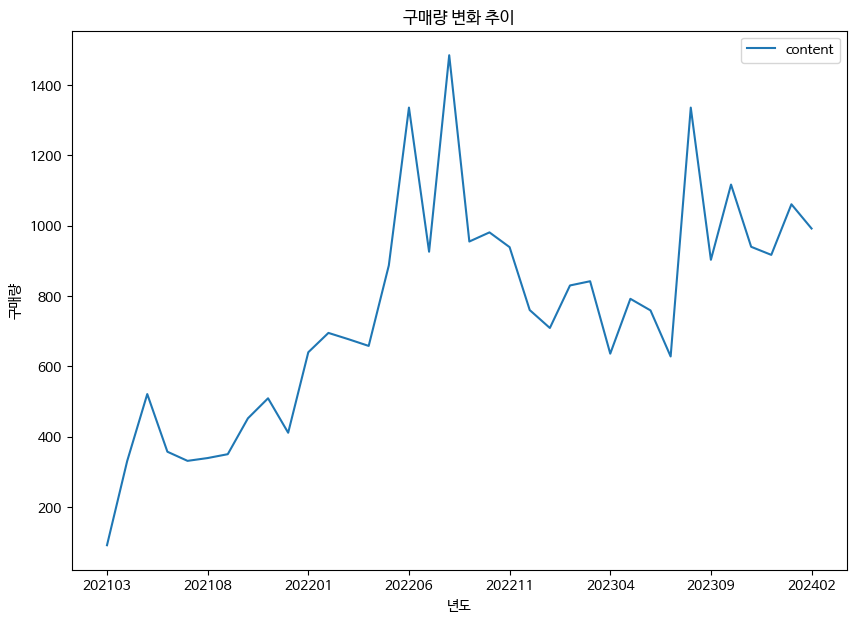

In [12]:
pivot_review_month = pd.pivot_table(pivot_review,index='date_format',values='content',aggfunc='sum')
ax = pivot_review_month.plot(kind='line',  figsize=(10, 7))

plt.title("Íµ¨Îß§Îüâ Î≥ÄÌôî Ï∂îÏù¥")
plt.xlabel("ÎÖÑÎèÑ")	
plt.ylabel("Íµ¨Îß§Îüâ")	
plt.show()	


## ÎÖÑÏ∞®Î≥Ñ Íµ¨Îß§Îüâ Î≥ÄÌôî Ï∂îÏù¥
- 1ÎÖÑÏ∞®Ïóê ÎπÑÌï¥ 2ÎÖÑÏ∞®Ïóê Íµ¨Îß§ÎüâÏù¥ ÏÉÅÎãπÌûà Ï¶ùÍ∞ÄÌïòÏòÄÍ≥† 3ÎÖÑÏ∞®ÏóêÎèÑ 2ÎÖÑÏ∞®ÏôÄ ÎπÑÏä∑Ìïú ÏàòÏ§ÄÏùÑ Ïú†ÏßÄÌï®

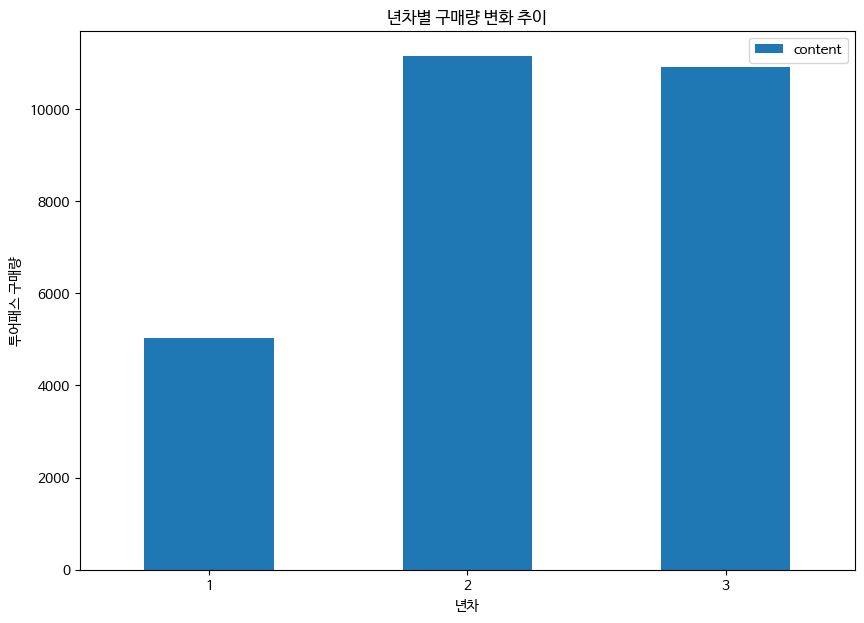

In [13]:
pivot_review_year = pd.pivot_table(pivot_review,index='year_count',values='content',aggfunc='sum')
ax = pivot_review_year.plot(kind='bar',  figsize=(10, 7))
plt.title('ÎÖÑÏ∞®Î≥Ñ Íµ¨Îß§Îüâ Î≥ÄÌôî Ï∂îÏù¥')
plt.xlabel('ÎÖÑÏ∞®')
plt.ylabel('Ìà¨Ïñ¥Ìå®Ïä§ Íµ¨Îß§Îüâ')
plt.xticks(rotation=0)

plt.show()

## ÏõîÎ≥Ñ Íµ¨Îß§Îüâ Î≥ÄÌôî Ï∂îÏù¥
- Ìú¥Í∞ÄÍ∞Ä ÎßéÏùÄ 8ÏõîÏóê ÏÉÅÎãπÏàò Íµ¨Îß§Ìïú Í≤ÉÏùÑ ÌôïÏù∏

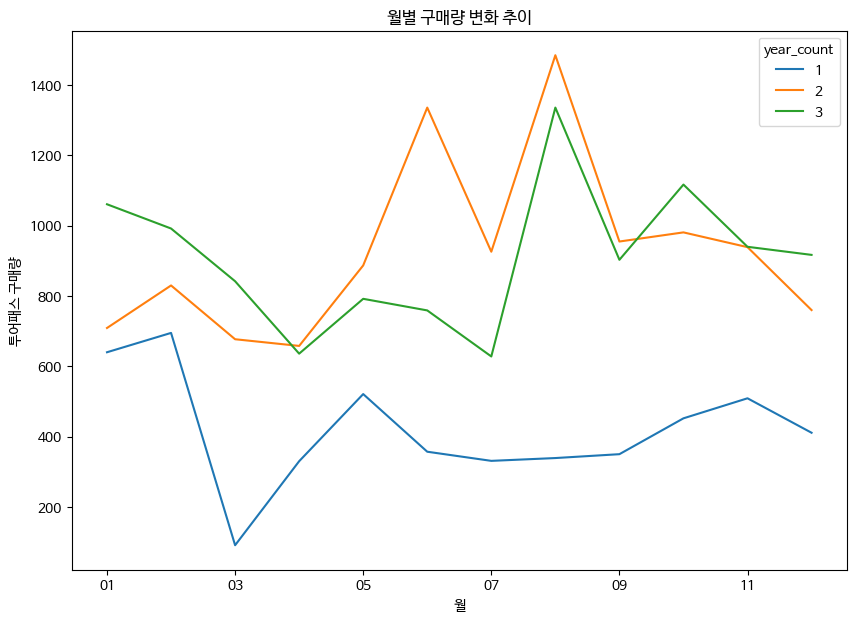

In [14]:
pivot_review_month = pd.pivot_table(pivot_review,index='month',columns='year_count',values='content',aggfunc='sum')
ax = pivot_review_month.plot(kind='line',  figsize=(10, 7))
plt.title('ÏõîÎ≥Ñ Íµ¨Îß§Îüâ Î≥ÄÌôî Ï∂îÏù¥')
plt.xlabel('Ïõî')
plt.ylabel('Ìà¨Ïñ¥Ìå®Ïä§ Íµ¨Îß§Îüâ')
plt.show()

In [16]:
# ÌÖçÏä§Ìä∏ ÌååÏùº Í≤ΩÎ°ú
file_path = '../ratings.txt'

# ÌÖçÏä§Ìä∏ ÌååÏùº ÏùΩÍ∏∞
with open(file_path, 'r') as file:
    text_data = file.read()
import pandas as pd
from io import StringIO

# ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º ÌååÏùº Í∞ùÏ≤¥Î°ú Î≥ÄÌôò
file_obj = StringIO(text_data)

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
train_data = pd.read_csv(file_obj, sep='\t')

In [17]:
train_data

id                                           document  label
0        8112052                                Ïñ¥Î¶¥ÎïåÎ≥¥Í≥† ÏßÄÍ∏àÎã§ÏãúÎ¥êÎèÑ Ïû¨Î∞åÏñ¥Ïöî„Öã„Öã      1
1        8132799  ÎîîÏûêÏù∏ÏùÑ Î∞∞Ïö∞Îäî ÌïôÏÉùÏúºÎ°ú, Ïô∏Íµ≠ÎîîÏûêÏù¥ÎÑàÏôÄ Í∑∏Îì§Ïù¥ ÏùºÍµ∞ Ï†ÑÌÜµÏùÑ ÌÜµÌï¥ Î∞úÏ†ÑÌï¥Í∞ÄÎäî Î¨∏ÌôîÏÇ∞...      1
2        4655635               Ìè¥Î¶¨Ïä§Ïä§ÌÜ†Î¶¨ ÏãúÎ¶¨Ï¶àÎäî 1Î∂ÄÌÑ∞ Îâ¥ÍπåÏßÄ Î≤ÑÎ¶¥Íªò ÌïòÎÇòÎèÑ ÏóÜÏùå.. ÏµúÍ≥†.      1
3        9251303  ÏôÄ.. Ïó∞Í∏∞Í∞Ä ÏßÑÏßú Í∞úÏ©îÍµ¨ÎÇò.. ÏßÄÎ£®Ìï†Í±∞ÎùºÍ≥† ÏÉùÍ∞ÅÌñàÎäîÎç∞ Î™∞ÏûÖÌï¥ÏÑú Î¥§Îã§.. Í∑∏Îûò Ïù¥Îü∞...      1
4       10067386                        ÏïàÍ∞ú ÏûêÏö±Ìïú Î∞§ÌïòÎäòÏóê Îñ† ÏûàÎäî Ï¥àÏäπÎã¨ Í∞ôÏùÄ ÏòÅÌôî.      1
...          ...                                                ...    ...
199995   8963373                                     Ìè¨Ïºì Î™¨Ïä§ÌÑ∞ ÏßúÍ∞Ä „Ö°„Ö°;;      0
199996   3302770                                              Ïì∞.Î†à.Í∏∞      0
199997   5458175                  ÏôÑÏ†Ñ ÏÇ¨Ïù¥ÏΩîÏòÅÌôî. ÎßàÏßÄÎßâÏùÄ ÎçîÏö±Îçî Ïù¥ ÏòÅÌôîÏùòÏßàÏùÑ Îñ®Ïñ¥Ìä∏Î¶∞Îã§.      0
199998   6908648                ÏôúÎÇú Ïû¨ÎØ∏ÏóÜÏóàÏßÄ „Ö†„Ö† ÎùºÎî∞ÎöúÏù¥ Î≥¥Í≥†ÎÇòÏÑú Ïä§Î®∏ÌîÑ Î¥êÏÑú Í∑∏Îü∞Í∞Ä „Öã„Öã      0
199999   8548411                                    Ìè¨ÌíçÏ†ÄÍ∑∏Í∞ÄÎÇòÍ∞ÄÏã†Îã§ÏòÅÏ∞®ÏòÅÏ∞®ÏòÅÏ∞®      0

[200000 rows x 3 columns]

In [18]:
def replace(text):
    text = text.replace('/n',' ')
    return text

In [52]:
df_tour_pass_review.loc[:,'review_clean_okt'] = df_tour_pass_review['content'].apply(replace)
df_tour_pass_review['review_clean_okt']

6       Ïó¨ÏàòÏ≤´Î∞©Î¨∏ÏùÄÏïÑÎãàÎùº ÎùºÌÖåÎùºÏä§Îûë ÌÖåÎîîÎ≤†Ïñ¥Î∞ïÎ¨ºÍ¥ÄÎßåÍ∞ÄÎèÑ ÎìùÏù¥ÎùºÍ≥†Ìï¥ÏÑú Ïó¨ÏàòÏÇ¨Îäî Î∂ÑÏù¥ Ï∂îÏ≤úÌïòÏÖî...
12      ü§ç ÏßÑÏßú ÏÉùÍ∞ÅÎ≥¥Îã§ ÏôÑÏ†Ñ ÎåÄÎ∞ïÏù¥ÏóêÏöî!! Ïó¨Ïàò Ïó¨ÌñâÍ∞ÄÎäî ÏßÄÏù∏Ïù¥ ÏûàÎã§Î©¥ ÏôÑÏ†Ñ Ï∂îÏ≤úÌï†Í±∞ Í∞ô...
30      Ïó¨Ïàò 1Î∞ï2Ïùº Ïó¨ÌñâÎèôÏïà Ìà¨Ïñ¥Ìå®Ïä§ ÎçïÏóê ÏïåÏ∞®Í≤å Ï¶êÍ≤ºÏäµÎãàÎã§!\nÍ∞ÄÍ≤©Ïù¥ Ïò¨ÎûêÎã§Îäî Î¶¨Î∑∞Î•º ...
41      Í∞ÄÍ≥†ÏûêÌñàÎçòÍ≥≥ÏùÄ Î∂ÑÎ™ÖÌå®Ïä§Í∂åÏóêÎäî Ïò§ÌîàÏù¥ÏòÄÎäîÎç∞ Í∞ÄÎ≥¥Îãà Îã´ÌòÄÏûàÍ≥†... ÏàòÎ¶¨Ï§ëÏù¥Í≥†..Ïπ¥Ìä∏ÎäîÌïò...
42      ÏßÑÏûë ÏïåÏïòÏúºÎ©¥ Ï¢ãÏïòÏùÑÌÖêÎç∞ Ïó¨ÏàòÏó¨Ìñâ Îß§ÎÖÑ Í∞ÄÎäîÌé∏Ïù∏Îç∞ Ïù¥Î†áÍ≤å Ï¢ãÏùÄ Ïó¨ÏàòÌå®Ïä§Î•º Ïù¥Ï†úÏïº Ïïå...
                              ...                        
1028                                        ÏïÑÏ£º Ï¢ãÏùÄ ÌòúÌÉùÎì§ÏûÖÎãàÎã§!
1029                                         ÎÑàÎ¨¥Ïû¨ÎØ∏ÎÇòÍ≤å ÎÜÄÏïòÏäµÎãàÎã§
1030                                           ÏïÑÏ£ºÏ¢ãÏïÑÏöîÏïÑÏ£ºÏ¢ãÏïÑÏöî
1036                                        Ïú†Ïö©ÌïòÍ≤å Ïûò 

In [20]:
from konlpy.tag import Okt
okt = Okt()
# Ï°∞ÏÇ¨, Ïñ¥ÎØ∏, Íµ¨ÎëêÏ†ê Í∞ôÏùÄ Í≤ÉÏùÑ Ï†úÍ±∞
def okt_clean(text):
    clean_text = []
    for word in okt.pos(text, stem=True):
        if word[1] in ['Adjective', 'Noun', 'Verb', 'Punctuation', 'KoreanParticle','Number']:
            clean_text.append(word[0])

    return " ".join(clean_text)

In [21]:
train_data['document'] = train_data['document'].astype(str)
train_data['review_clean_okt'] = train_data['document'].apply(okt_clean)
df_tour_pass_review['review_clean_okt'] = df_tour_pass_review['review_clean_okt'].apply(okt_clean)

# ÌïôÏäµ, ÌÖåÏä§Ìä∏, Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ•ò

In [28]:
train_feature = train_data['review_clean_okt']
train_target = train_data['label']

In [29]:
# train, test ÎÇòÎàÑÍ∏∞
from sklearn.model_selection import train_test_split

feature_train, feature_test, target_train, target_test = train_test_split(train_feature, train_target, test_size=0.6, random_state=42)

# Î≤°ÌÑ∞ÌôîÌïòÍ∏∞

In [30]:
feature_train

100923    ÏºÄÎπà Ïä§ ÌéòÏù¥ Ïãú , Ï§ÑÎ¶¨ Ïï§ Î¨¥Ïñ¥ .. Ïù¥Î¶Ñ ÎãπÏó∞ÌïòÎã§ Ïó∞Í∏∞ Îßê ÌïòÎã§ ÏóÜÎã§ ÏõêÏûë 1...
117033                                      Î∞úÌôîÏ†ê ÎÑòÎã§ Î™ª Ï±Ñ Ïó∞ÏÜå .
179459                                         Ïñ¥Ïù¥ ÏïÑÎ¶¨Îßà ÏÖç „Öé„Öé„Öé
177925                                     ÎØ∏Íµ∞ ÎÅÑÎã§ ÌèâÏ†ê ÎÜíÎã§ ÎåÄÏÑ∏ ?
138125    Í≤∞ÏΩî ÌèâÏ†ê 9.83 ÏßúÎã§ Î¶¨ Ï†àÎåÄ ÏïÑÎãàÎã§ ÏÉùÍ∞Å ÌïòÎã§ Í≥º Í∞êÌûà 1 Ï†êÏ§å ... ÌèâÏ†ê ...
                                ...                        
119879                                      Í∞úÎã§ Î¶¨ÏßÄ Î¶¨ÏßÄ Îßà Î≥ÄÌÉú ÎÖÑ
103694    ÏßÄÎ£®ÌïòÎã§ ÏßúÏ¶ùÎÇòÎã§ Ïñ¥ÏßÄÎüΩÎã§ Ïã±Í≤ÅÎã§ ... Ïû¨Ïàò ÏóÜÎã§ Î∂àÏæåÌïòÎã§ ÏòÅÌôî .. ÏòÅÌôî Î∂ÄÎ•¥Îã§...
131932                         Ïä§ÌÅ¨Î¶º Í∞ôÎã§ ÏòÅÌôî ÎßåÎì§Îã§ Ïã∂Îã§ Î≥¥Îã§ ÌÉù ÏóÜÎã§ -_-
146867            Ï†úÏûëÎπÑ ÌÉì ÌïòÎã§ ÎπàÏïΩÌïòÎã§ Í∞ÅÎ≥∏ . ÏõêÏûë ÏÇ¥Î¶¨Îã§ Ï±Ñ Ïù¥Ïú† Ïó∞Í≤∞ ÎêòÎã§ ÌîåÎ°Ø .
121958                                         Ïû¨ÎØ∏ÏóÜÎã§ .......
Name: review

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1,2))
feature_train = tfidfVectorizer.fit_transform(feature_train)
feature_train.toarray()[:2]
dictionary_list = tfidfVectorizer.get_feature_names_out()
dictionary_list

array(['00', '00 00', '00 Í∞êÎèÖ', ..., 'ÌûùÌûù Ï†ïÎßê', 'Ìû£ÌûàÌûàÌó§', 'Ìû£ÌûàÌûàÌó§ Ìó§Ìó§'],
      dtype=object)

In [32]:
feature_test = tfidfVectorizer.transform(feature_test)

# Í∏ç, Î∂ÄÏ†ï Î∂ÑÎ•ò Î™®Îç∏ ÏÑ†ÌÉùÌïòÍ∏∞
- Í∞ÄÏû• ÎÜíÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïù∏ SVC ÏÑ†ÌÉù

### randomforestclassifier

In [83]:
from sklearn.ensemble import RandomForestClassifier
classification_topic = RandomForestClassifier(n_jobs=-1)

In [84]:
classification_topic.fit(feature_train, target_train)

RandomForestClassifier(n_jobs=-1)

In [85]:
target_train_predict = classification_topic.predict(feature_train)

In [86]:
# classification_reportÎ°ú model ÏÑ±Îä• ÌôïÏù∏
from sklearn.metrics import classification_report
print(classification_report(target_train, target_train_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     39869
           1       0.98      1.00      0.99     40131

    accuracy                           0.99     80000
   macro avg       0.99      0.99      0.99     80000
weighted avg       0.99      0.99      0.99     80000



In [87]:
target_test_predict = classification_topic.predict(feature_test)

In [88]:
from sklearn.metrics import classification_report
print(classification_report(target_test, target_test_predict))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82     60131
           1       0.81      0.82      0.82     59869

    accuracy                           0.82    120000
   macro avg       0.82      0.82      0.82    120000
weighted avg       0.82      0.82      0.82    120000



### logisticRegression

In [89]:
from sklearn import linear_model
logisticRegression=linear_model.LogisticRegression()

In [90]:
logisticRegression.fit(feature_train,target_train)

LogisticRegression()

In [91]:
target_train_predict = logisticRegression.predict(feature_train)

In [92]:
# classification_reportÎ°ú model ÏÑ±Îä• ÌôïÏù∏
from sklearn.metrics import classification_report
print(classification_report(target_train, target_train_predict))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     39869
           1       0.92      0.89      0.90     40131

    accuracy                           0.91     80000
   macro avg       0.91      0.91      0.91     80000
weighted avg       0.91      0.91      0.91     80000



In [93]:
target_test_predict = logisticRegression.predict(feature_test)

In [94]:
from sklearn.metrics import classification_report
print(classification_report(target_test, target_test_predict))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83     60131
           1       0.84      0.82      0.83     59869

    accuracy                           0.83    120000
   macro avg       0.83      0.83      0.83    120000
weighted avg       0.83      0.83      0.83    120000



### randomforestclassifier

In [101]:
from sklearn.ensemble import RandomForestClassifier
classification_topic = RandomForestClassifier(n_jobs=-1)

In [102]:
classification_topic.fit(feature_train, target_train)

RandomForestClassifier(n_jobs=-1)

In [103]:
target_train_predict = classification_topic.predict(feature_train)

In [104]:
# classification_reportÎ°ú model ÏÑ±Îä• ÌôïÏù∏
from sklearn.metrics import classification_report
print(classification_report(target_train, target_train_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     39869
           1       0.98      1.00      0.99     40131

    accuracy                           0.99     80000
   macro avg       0.99      0.99      0.99     80000
weighted avg       0.99      0.99      0.99     80000



In [105]:
target_test_predict = classification_topic.predict(feature_test)

In [106]:
from sklearn.metrics import classification_report
print(classification_report(target_test, target_test_predict))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82     60131
           1       0.81      0.82      0.82     59869

    accuracy                           0.82    120000
   macro avg       0.82      0.82      0.82    120000
weighted avg       0.82      0.82      0.82    120000



### K-Nearest Neighbors

In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [108]:
knn.fit(feature_train, target_train)

KNeighborsClassifier()

In [109]:
target_train_predict = knn.predict(feature_train)

In [110]:
# classification_reportÎ°ú model ÏÑ±Îä• ÌôïÏù∏
from sklearn.metrics import classification_report
print(classification_report(target_train, target_train_predict))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72     39869
           1       0.72      0.74      0.73     40131

    accuracy                           0.73     80000
   macro avg       0.73      0.73      0.73     80000
weighted avg       0.73      0.73      0.73     80000



In [111]:
target_test_predict = knn.predict(feature_test)

In [112]:
from sklearn.metrics import classification_report
print(classification_report(target_test, target_test_predict))

              precision    recall  f1-score   support

           0       0.60      0.57      0.59     60131
           1       0.59      0.61      0.60     59869

    accuracy                           0.59    120000
   macro avg       0.59      0.59      0.59    120000
weighted avg       0.59      0.59      0.59    120000



### Support Vector Machine

In [33]:
from sklearn import svm
svm_model = svm.SVC()

In [34]:
svm_model.fit(feature_train, target_train)

SVC()

In [35]:
target_train_predict = svm_model.predict(feature_train)

In [36]:
# classification_reportÎ°ú model ÏÑ±Îä• ÌôïÏù∏
from sklearn.metrics import classification_report
print(classification_report(target_train, target_train_predict))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     39869
           1       0.97      0.98      0.97     40131

    accuracy                           0.97     80000
   macro avg       0.97      0.97      0.97     80000
weighted avg       0.97      0.97      0.97     80000



In [37]:
target_test_predict = svm_model.predict(feature_test)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(target_test, target_test_predict))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84     60131
           1       0.83      0.85      0.84     59869

    accuracy                           0.84    120000
   macro avg       0.84      0.84      0.84    120000
weighted avg       0.84      0.84      0.84    120000



# Ìà¨Ïñ¥Ìå®Ïä§ Íµ¨Îß§ÌõÑÍ∏∞ Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÏö©

In [40]:
features=tfidfVectorizer.transform(df_tour_pass_review['review_clean_okt'])

In [41]:
df_tour_pass_review['goodorbad'] = svm_model.predict(features)

In [42]:
df_tour_pass_review['goodorbad'].value_counts()

goodorbad
1    21308
0     5784
Name: count, dtype: int64

In [50]:
df_tour_pass_review.query("goodorbad ==0")

_id  \
41    663dea3c06635b047a688c7e   
63    663dea3e06635b047a688c94   
71    663dea3e06635b047a688c9c   
79    663dea3e06635b047a688ca4   
83    663dea4006635b047a688ca8   
...                        ...   
1026  663edbfa985956deccdaa4f8   
1027  663edbfa985956deccdaa4f9   
1029  663edbfa985956deccdaa4fb   
1036  663edc18bd57e89361e03562   
1037  663edc18bd57e89361e03563   

                                                title region rating  \
41           Ïó¨ÏàòÌà¨Ïñ¥Ìå®Ïä§ ÌÜµÌï©Í∂å Ïó¨ÏàòÌï´ÌîåÌå®Ïä§ ÌÖåÎîîÎ≤†Ïñ¥ÎÆ§ÏßÄÏóÑ ÎÖπÌÖåÎßàÎ†à ÌÅ¨Î£®Ï¶à Î£®ÏßÄ Î™®Ï∞å     Ï†ÑÎÇ®      1   
63           Ïó¨ÏàòÌà¨Ïñ¥Ìå®Ïä§ ÌÜµÌï©Í∂å Ïó¨ÏàòÌï´ÌîåÌå®Ïä§ ÌÖåÎîîÎ≤†Ïñ¥ÎÆ§ÏßÄÏóÑ ÎÖπÌÖåÎßàÎ†à ÌÅ¨Î£®Ï¶à Î£®ÏßÄ Î™®Ï∞å     Ï†ÑÎÇ®      5   
71           Ïó¨ÏàòÌà¨Ïñ¥Ìå®Ïä§ ÌÜµÌï©Í∂å Ïó¨ÏàòÌï´ÌîåÌå®Ïä§ ÌÖåÎîîÎ≤†Ïñ¥ÎÆ§ÏßÄÏóÑ ÎÖπÌÖåÎßàÎ†à ÌÅ¨Î£®Ï¶à Î£®ÏßÄ Î™®Ï∞å     Ï†ÑÎÇ®      5   
79           Ïó¨ÏàòÌà¨Ïñ¥Ìå®Ïä§ ÌÜµÌï©Í∂å Ïó¨ÏàòÌï´ÌîåÌå®Ïä§ ÌÖåÎîîÎ≤†Ïñ¥ÎÆ§ÏßÄÏóÑ ÎÖπÌÖåÎßàÎ†à ÌÅ¨Î£®Ï¶à Î£®ÏßÄ Î™®Ï∞å     Ï†ÑÎÇ®      5   
83           Ïó¨ÏàòÌà¨Ïñ¥Ìå®Ïä§ ÌÜµÌï©Í∂å Ïó¨ÏàòÌï´ÌîåÌå®Ïä§ ÌÖåÎîîÎ≤†Ïñ¥ÎÆ§ÏßÄÏóÑ ÎÖπÌÖåÎßàÎ†à ÌÅ¨Î£®Ï¶à Î£®ÏßÄ Î™®Ï∞å     Ï†ÑÎÇ®      5   
...                                               ...    ...    ...   
1026                     [Ï£ºÎßêÏóêÏñ¥ÎîîÍ∞Ä] Í∞ïÎ¶âÌîÑÎ¶¨Ìå®Ïä§ Í∞ïÎ¶âÌà¨Ïñ¥Ìå®Ïä§\nÎã®ÎèÖÌäπÍ∞Ä     Í∞ïÏõê      4   
1027                     [Ï£ºÎßêÏóêÏñ¥ÎîîÍ∞Ä] Í∞ïÎ¶âÌîÑÎ¶¨Ìå®Ïä§ Í∞ïÎ¶âÌà¨Ïñ¥Ìå®Ïä§\nÎã®ÎèÖÌäπÍ∞Ä     Í∞ïÏõê      3   
1029                     [Ï£ºÎßêÏóêÏñ¥ÎîîÍ∞Ä] Í∞ïÎ¶âÌîÑÎ¶¨Ìå®Ïä§ Í∞ïÎ¶âÌà¨Ïñ¥Ìå®Ïä§\nÎã®ÎèÖÌäπÍ∞Ä     Í∞ïÏõê      5   
1036  [Ï£ºÎßêÏóêÏñ¥ÎîîÍ∞Ä] Í∞ïÎ¶âNÌà¨Ïñ¥Ìå®Ïä§\nÎ¨¥Î£å ÌòúÌÉù Ï†úÍ≥µ ÏãúÏÑ§Î°úÎßå\nÏù¥Î£®Ïñ¥ÏßÑ Î∂ÄÎã¥ÏóÜÎäî Í∞ïÎ¶âÏó¨Ìñâ     Í∞ïÏõê      5   
1037  [Ï£ºÎßêÏóêÏñ¥ÎîîÍ∞Ä] Í∞ïÎ¶âNÌà¨Ïñ¥Ìå®Ïä§\nÎ¨¥Î£å ÌòúÌÉù Ï†úÍ≥µ ÏãúÏÑ§Î°úÎßå\nÏù¥Î£®Ïñ¥ÏßÑ Î∂ÄÎã¥ÏóÜÎäî Í∞ïÎ¶âÏó¨Ìñâ     Í∞ïÏõê      5   

           date                                            content  \
41    24.02.21.  Í∞ÄÍ≥†ÏûêÌñàÎçòÍ≥≥ÏùÄ Î∂ÑÎ™ÖÌå®Ïä§Í∂åÏóêÎäî Ïò§ÌîàÏù¥ÏòÄÎäîÎç∞ Í∞ÄÎ≥¥Îãà Îã´ÌòÄÏûàÍ≥†... ÏàòÎ¶¨Ï§ëÏù¥Í≥†..Ïπ¥Ìä∏ÎäîÌïò...   
63    24.02.23.     Ïó¨ÏàòÏó¨Ìñâ Í∞ÄÏÑú Ïûò ÏÇ¨Ïö© ÌïòÍ≥† ÏôîÏñ¥Ïöî \n.\nÎ™∞ÎûêÎçò ÎßõÏßë Î™ÖÏÜå Íµ¨Í≤Ω ÌïòÍ∏∞ Ï¢ãÏïòÏñ¥Ïöî.   
71    24.01.12.  Ï†ÄÎ†¥Ìïú Í∞ÄÍ≤©ÏúºÎ°ú Ïó¨Ïàò Ïó¨Í∏∞Ï†ÄÍ∏∞ ÌÉêÎ∞©Ïù¥ Í∞ÄÎä•Ìï¥ÏÑú ÎÑàÎ¨¥ Ï¢ãÏïòÏñ¥Ïöî! Ïù¥Í±∞ Î™∞ÎûêÏö∏Îïê Í≥ÑÌöçÏß§...   
79    24.02.01.  Ïó¨ÏàòÌå®Ïä§Î°ú Î∞∞Í≥†ÌÉÄÍ≥† Îî∏Í∏∞Î™®Ï∞åÎèÑ Í∞Å Í∞ÄÍ≤åÏóêÏÑú ÌïúÍµ¨Ïî© Î®πÍ≥† ÏãúÎûòÍ∏∞Íµ≠ÎèÑ Î∞õÏïÑÏôîÎäîÎç∞ ÏÉùÍ∞ÅÎ≥¥...   
83    24.01.08.  Ïó¨Ïàò ÎùºÌÖåÎùºÏä§Îûë ÌÖåÎîîÎ≤†Ïñ¥ÎÆ§ÏßÄÏóÑÎßå Í∞ÄÎèÑ ÎΩïÎΩëÏïÑÏöî! ÎÇÆÏóê ÌÖåÎîîÎ≤†Ïñ¥ÎÆ§ÏßÄÏóÑÏóêÏÑú Ìïú ÏÑ∏ÏãúÍ∞ÑÎèô...   
...         ...                                                ...   
1026  24.02.17.    ÏãúÍ∞ÑÏù¥ ÏóÜÏñ¥ÏÑú Îã§ Î™ª Îì§Î†§ÏÑú ÏïÑÏâΩÏßÄÎßå..\nÏª§ÌîºÎûë Ïù¥Í≥≥Ï†ÄÍ≥≥ Ìà¨Ïñ¥Ìå®Ïä§Î°ú Îã§ÎÖÄÏÑú Ï¢ãÏïòÏñ¥Ïöî   
1027  23.12.24.              Ïó¨Îü¨Ìà¨Ïñ¥Ìå®Ïä§Î•º Ïç®Î¥§ÏßÄÎßå 1ÏãúÍ∞ÑÏóê ÌïúÎ≤àÏî© Ïì∞Í≤å ÎßåÎì†Í±¥ ÎÑàÎ¨¥ Î∂àÌé∏ÌñàÏñ¥Ïöî   
1029  23.12.05.                                       ÎÑàÎ¨¥Ïû¨ÎØ∏ÎÇòÍ≤å ÎÜÄÏïòÏäµÎãàÎã§   
1036  24.02.27.                                      Ïú†Ïö©ÌïòÍ≤å Ïûò ÏÇ¨Ïö©ÌñàÏäµÎãàÎã§   
1037  24.02.10.                                      Ï†ÄÎ†¥Ìûà ÏûòÏÇ¨ÏÑú ÏûòÏçºÏñ¥Ïöî!   

     date_format  year month  year_count  \
41        202402  2024    02           3   
63        202402  2024    02           3   
71        202401  2024    01           3   
79        202402  2024    02           3   
83        202401  2024    01           3   
...          ...   ...   ...         ...   
1026      202402  2024    02           3   
1027      202312  2023    12           3   
1029      202312  2023    12           3   
1036      202402  2024    02           3   
1037      202402  2024    02           3   

                                       review_clean_okt  goodorbad  
41    Í∞ÄÎã§ ÌïòÎã§ Í≥≥ Î∂ÑÎ™Ö Ìå®Ïä§ Ïò§Ìîà Ïù¥Îã§ Í∞ÄÎ≥¥Îã§ Îã´ÌûàÎã§ ... ÏàòÎ¶¨ .. Ïπ¥Ìä∏ ÎäòÎã§ .....          0  
63       Ïó¨Ïàò Ïó¨Ìñâ Í∞ÄÎã§ Ï

# Í≤∞Î°†
- Î™®Îç∏ÎßÅ Îç∞Ïù¥ÌÑ∞Í∞Ä Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞ÏôÄ Îã¨ÎùºÏÑú Î∂ÑÎ•òÍ∞Ä Ï†úÎåÄÎ°ú ÎêòÏßÄ ÏïäÏùå